# 1. Read Data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# connect to google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# train dataset
train_df = pd.read_csv("/content/drive/MyDrive/Dataset/Data/train.csv", index_col='PassengerId')
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# test dataset
test_df = pd.read_csv("/content/drive/MyDrive/Dataset/Data/test.csv", index_col='PassengerId')
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# 2. Preview Data

## 2.1 Train Dataset

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# function to evaluate missing data
def EvaluateMissingData(df):
  rows, cols = df.shape
  columns = df.columns
  for column in columns:
    if df[column].isnull().sum() > 0:
      missingData = ((df[column].isnull().sum()/rows) * 100)
      print(f"Column '{column}': {missingData:.2f}% Missing Data")

In [ ]:
# train_df
EvaluateMissingData(train_df)

Column 'Age': 19.87% Missing Data
Column 'Cabin': 77.10% Missing Data
Column 'Embarked': 0.22% Missing Data


In [ ]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df["Survived"] = train_df["Survived"].astype('category')

In [ ]:
categorical_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
# Function convert to Category dtype
def Convert2Category(df, features):
  for feature in features:
    df[feature] = df[feature].astype('category')

In [ ]:
Convert2Category(train_df, categorical_features)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [ ]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [ ]:
train_df.describe(include="category")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 2.2 Test Dataset

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [ ]:
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [ ]:
EvaluateMissingData(test_df)

Column 'Age': 20.57% Missing Data
Column 'Fare': 0.24% Missing Data
Column 'Cabin': 78.23% Missing Data


In [ ]:
Convert2Category(test_df, categorical_features)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


In [ ]:
test_df.describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


In [ ]:
test_df.describe(include = 'category')

,Pclass,Sex,SibSp,Parch,Embarked
count,418,418,418,418,418
unique,3,2,7,8,3
top,3,male,0,0,S
freq,218,266,283,324,270


# 3. Exploratory Data Analysis (EDA)

## 3.1 EDA Categorical Features

In [ ]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [ ]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

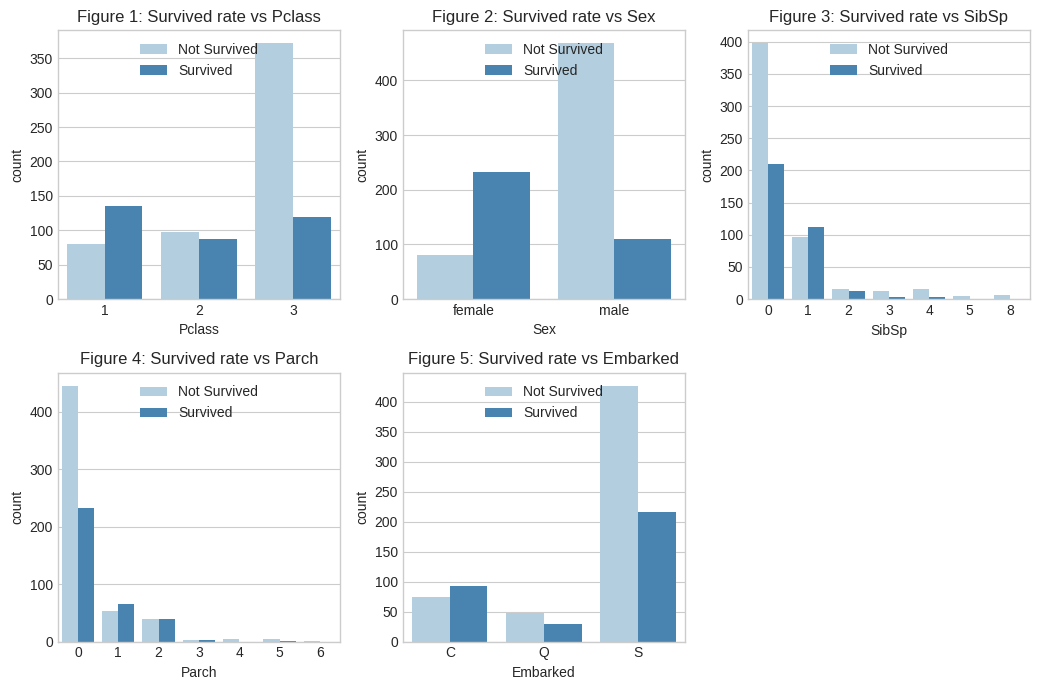

In [ ]:
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols,figsize = (n_cols*3.5, n_rows*3.5))

idx_col = 0
n_figures = len(categorical_features)

for row in range(0, n_rows):
  for col in range(0, n_cols):
    if idx_col <= n_figures - 1:
      ax_idx = ax[row, col]
      sns.countplot(data=train_df, x=categorical_features[idx_col], hue="Survived", ax=ax_idx, palette="Blues")
      ax_idx.set_title(f"Figure {idx_col+1}: Survived rate vs {categorical_features[idx_col]}")
      ax_idx.legend(title = "", loc="upper center", labels = ["Not Survived", "Survived"])
      idx_col = idx_col + 1

ax.flat[-1].set_visible(False) # remove the last subplot
plt.tight_layout()

Overview
* `Figure 1`: **1st** Passengers have a higher survival rate while **3rd** passengers have a very low survival rate. For **2nd** passengers, the survival and non-survival rates are almost equal.
* `Figure 2`: Females have a higher survival rate than males ("Lady first").
* `Figure 3` & `Figure 4`: Passengers not going with family are mostly not survived. The number of passenger with 1-2 family members has a better chance of survival.
* `Figure 5`: Most passengers embarked on Southampton so they have a higher survived rate and not survived rate.

## 3.2 EDA Mumerical Features

In [ ]:
numerical_features = ["Age", "Fare"]

### `Age`

In [ ]:
train_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

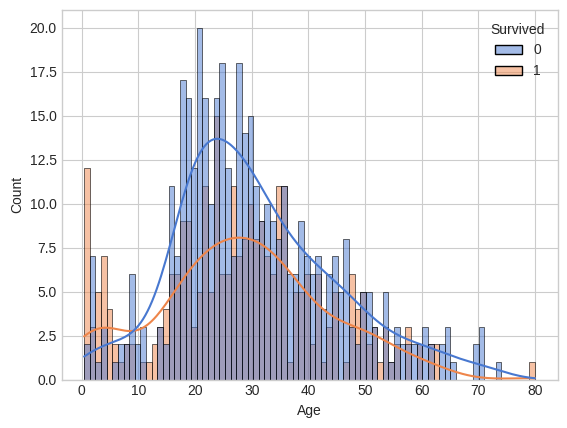

In [ ]:
sns.histplot(data=train_df, x = "Age", hue = "Survived", kde = True, bins=80, palette = "muted")

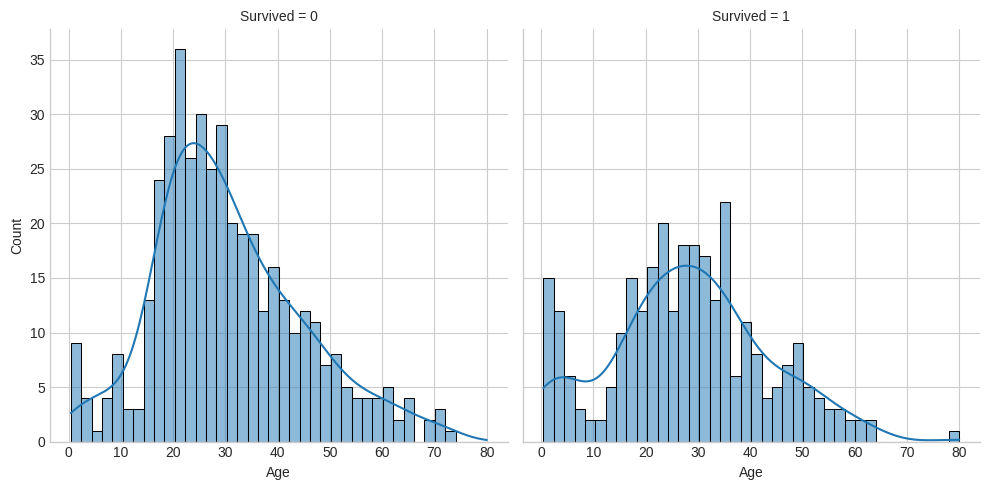

In [ ]:
sns.displot(data=train_df, x = "Age", col = "Survived", kde = True, bins=40)

In [ ]:
train_df.loc[(train_df.Age >= 16) & (train_df.Age <= 35)].shape

(414, 11)

In [ ]:
train_df.shape

(891, 11)

In [ ]:
print(f"The number of passengers between the ages of about 16 and 35 accounts for: {(414/891)*100:.2f}")

The number of passengers between the ages of about 16 and 35 accounts for: 46.46


**Overview**
* Children have a higher survival rate.
* Most passengers on the ship are between **16** and **35** years old, accounting for **46.46%** and have a lower so the number of non-survived is quite high.

### `Fare`

<Axes: xlabel='Fare', ylabel='Count'>

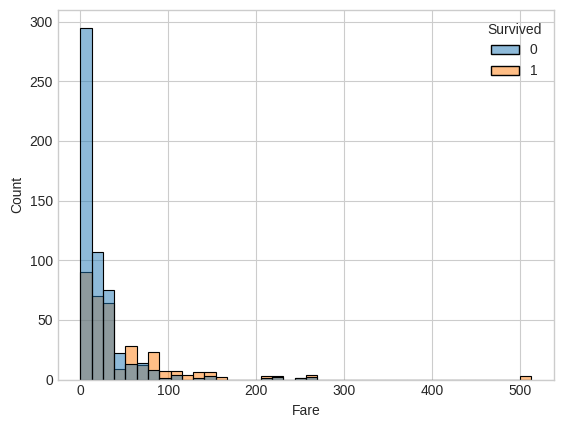

In [ ]:
sns.histplot(data = train_df, x="Fare", bins = 40, hue="Survived")

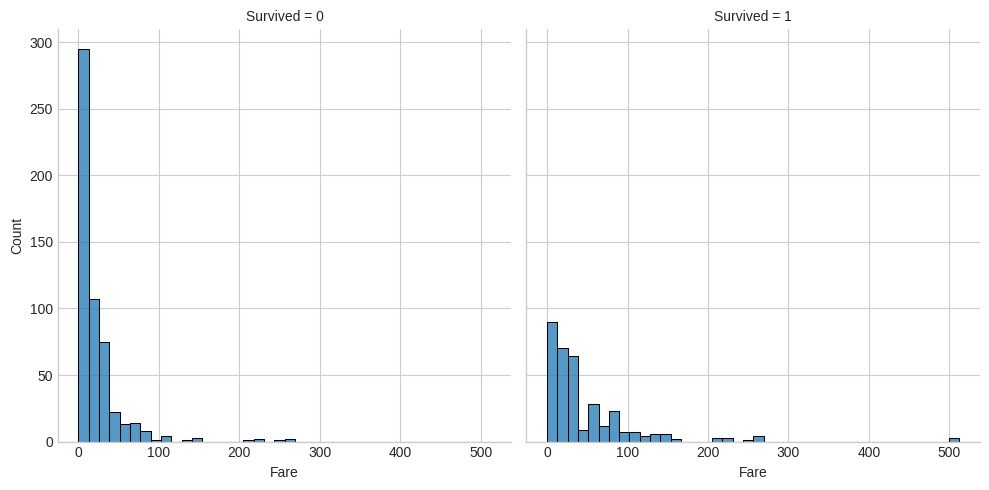

In [ ]:
sns.displot(data = train_df, x="Fare", col = "Survived", bins = 40)

In [ ]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
train_df.loc[(train_df.Fare == 0)].shape

(15, 11)

In [ ]:
ticket_type = ["Economic", "Standard", "Expensive", "Luxury"]
quartile_fare = pd.qcut(train_df['Fare'], 4, labels=ticket_type)

<Axes: xlabel='Fare', ylabel='count'>

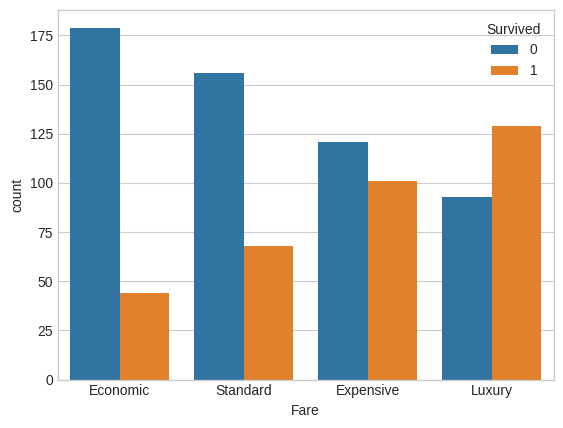

In [ ]:
sns.countplot(data = train_df, x = quartile_fare, hue = "Survived")

**Overview**
* The passengers with high fares have a higher survival rate.

# 4. Feature Engineering

## `Name`

In [ ]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# extract the title from the name
import re
def ExtractTitleName(name):
  p = re.compile(r",([\w\s]+)\.")
  return p.search(name).groups(1)[0].strip()

In [ ]:
train_df['Title_Name'] = train_df['Name'].apply(lambda name: ExtractTitleName(name))
train_df['Title_Name']

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Title_Name, Length: 891, dtype: object

In [ ]:
train_df['Title_Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title_Name, dtype: int64

In [ ]:
test_df['Title_Name'] = test_df['Name'].apply(lambda name: ExtractTitleName(name))
test_df['Title_Name']

PassengerId
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
         ...  
1305        Mr
1306      Dona
1307        Mr
1308        Mr
1309    Master
Name: Title_Name, Length: 418, dtype: object

In [ ]:
test_df['Title_Name'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title_Name, dtype: int64

In [ ]:
title_list = ['Mr','Miss','Mrs',' Master']
def GroupTitle(title):
  if title in title_list:
    return title
  elif title == "Ms":
    return "Miss"
  else:
    return "Others"

In [ ]:
train_df['Title_Name'] = train_df['Title_Name'].apply(lambda title: GroupTitle(title))
train_df['Title_Name'].value_counts()

Mr        517
Miss      183
Mrs       125
Others     66
Name: Title_Name, dtype: int64

In [ ]:
test_df['Title_Name'] = test_df['Title_Name'].apply(lambda title: GroupTitle(title))
test_df['Title_Name'].value_counts()

Mr        240
Miss       79
Mrs        72
Others     27
Name: Title_Name, dtype: int64

<Axes: xlabel='Title_Name', ylabel='count'>

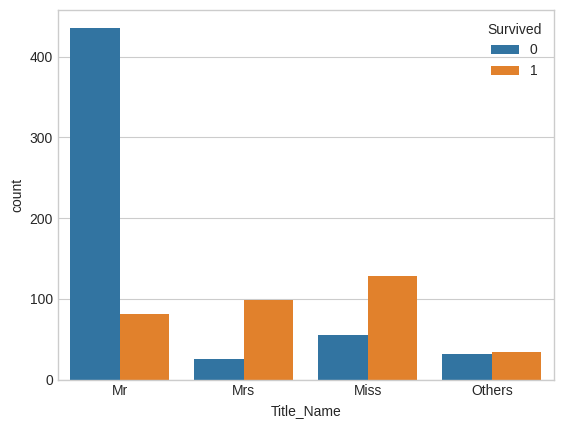

In [ ]:
sns.countplot(data = train_df, x='Title_Name', hue='Survived')

In [ ]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title_Name'],
      dtype='object')

## `SibSp` & `Parch`

In [ ]:
train_df.describe(include = "category")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [ ]:
train_df['Family_Size'] = train_df['SibSp'].astype(int) + train_df['Parch'].astype(int) + 1
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name,Family_Size
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4


In [ ]:
test_df['Family_Size'] = test_df['SibSp'].astype(int) + test_df['Parch'].astype(int) + 1

In [ ]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name,Family_Size
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Others,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1


In [ ]:
train_df['Family_Size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_Size, dtype: int64

<Axes: xlabel='Family_Size', ylabel='count'>

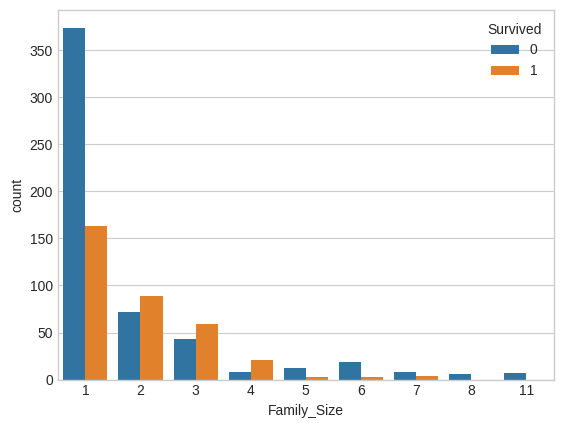

In [ ]:
sns.countplot(data=train_df, x='Family_Size', hue='Survived')

In [ ]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins = [0, 1, 4, 6, 20], labels=['Solo','Small','Medium','Large'])

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,1,Solo
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,Solo
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,Small


<Axes: xlabel='Family_Cat', ylabel='count'>

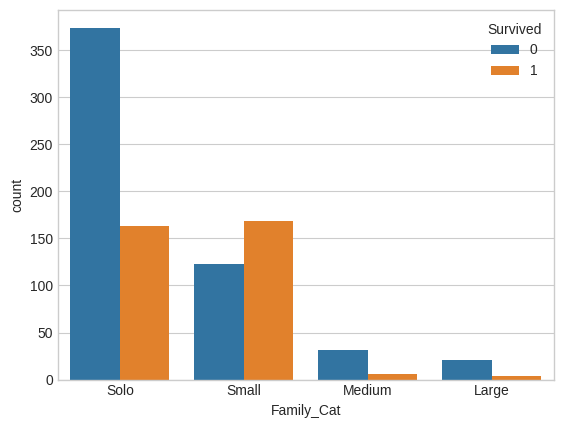

In [ ]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived')

In [ ]:
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins = [0, 1, 4, 6, 20], labels=['Solo','Small','Medium','Large'])
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,Solo
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,Small
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,Solo
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,Solo
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,Solo
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Others,1,Solo
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,Solo


In [ ]:
train_df.shape, test_df.shape

((891, 14), (418, 13))

# 5. Data Wrangling

In [ ]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title_Name', 'Family_Size', 'Family_Cat'],
      dtype='object')

In [ ]:
cat_features = ['Pclass','Sex','Embarked','Title_Name','Family_Cat']
num_features = ['Age','Fare']
features = cat_features + num_features

In [ ]:
EvaluateMissingData(train_df)

Column 'Age': 19.87% Missing Data
Column 'Cabin': 77.10% Missing Data
Column 'Embarked': 0.22% Missing Data


In [ ]:
EvaluateMissingData(test_df)

Column 'Age': 20.57% Missing Data
Column 'Fare': 0.24% Missing Data
Column 'Cabin': 78.23% Missing Data


## 5.1 Filling missing values

**Age**

In [ ]:
train_df[features]

,Pclass,Sex,Embarked,Title_Name,Family_Cat,Age,Fare
PassengerId,,,,,,,
1,3,male,S,Mr,Small,22.0,7.2500
2,1,female,C,Mrs,Small,38.0,71.2833
3,3,female,S,Miss,Solo,26.0,7.9250
4,1,female,S,Mrs,Small,35.0,53.1000
5,3,male,S,Mr,Solo,35.0,8.0500
...,...,...,...,...,...,...,...
887,2,male,S,Others,Solo,27.0,13.0000
888,1,female,S,Miss,Solo,19.0,30.0000
889,3,female,S,Miss,Small,NaN,23.4500


In [ ]:
train_df.groupby(['Sex','Pclass']).median(numeric_only=True)['Age']

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
# fill the missing values in Age with the median value after grouping between Sex and Pclass
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

<ipython-input-140-5eb0a5743a08>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [ ]:
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

<ipython-input-141-644b2ec4730f>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [ ]:
print("Train DF")
EvaluateMissingData(train_df)
print("Test DF")
EvaluateMissingData(test_df)

Train DF
Column 'Cabin': 77.10% Missing Data
Column 'Embarked': 0.22% Missing Data
Test DF
Column 'Fare': 0.24% Missing Data
Column 'Cabin': 78.23% Missing Data


## 5.2 Preprocessing With Pipline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# make Pipeline

num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
# train & test split

X = train_df[features]
y = train_df['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, train_size=0.8, random_state=1704)

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked', 'Title_Name',
                                  'Family_Cat'])])

In [ ]:
X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [ ]:
X_test = test_df[features]
X_test = preprocessor.transform(X_test)

# 6. Training Model

## 6.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression(solver='liblinear', max_iter=1000)
log_regr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_regr.score(X_valid, y_valid)

0.8212290502793296

In [ ]:
y_log_reg_predict = log_regr.predict(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

In [ ]:
print(classification_report(y_true=y_valid, y_pred=y_log_reg_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       111
           1       0.80      0.71      0.75        68

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



## 6.2 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dTree_cf = DecisionTreeClassifier(criterion='entropy', random_state=2110)
dTree_cf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2110)

In [ ]:
dTree_cf.score(X_valid, y_valid)

0.7821229050279329

In [ ]:
y_dTree_cf_predict = dTree_cf.predict(X_valid)

In [ ]:
print(classification_report(y_true=y_valid, y_pred=y_dTree_cf_predict))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       111
           1       0.72      0.71      0.71        68

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## 6.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rdForest_cf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=2110)
rdForest_cf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=2110)

In [ ]:
y_forest_predict = rdForest_cf.predict(X_valid)

In [ ]:
print(classification_report(y_true=y_valid, y_pred=y_forest_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       111
           1       0.80      0.71      0.75        68

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



# 7. Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
models = [
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(criterion='entropy', random_state=2110),
    RandomForestClassifier(n_estimators=100, oob_score=True, random_state=2110)
]

def BaselineModels(models, X, y, metrics, cv=5):
  sk_folds = StratifiedKFold(n_splits = cv, shuffle = True, random_state = 1704)

  entries_1 = []
  entries_2 = []

  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, scoring=metrics ,cv = sk_folds)

    entries_2.append((model_name, scores.mean(), scores.std()))

    for fold_idx, score in enumerate(scores):
      entries_1.append((model_name, fold_idx, score))

  each_fold_df = pd.DataFrame(entries_1, columns = ['Model', 'Fold Id', metrics])
  synthesis_fold_df = pd.DataFrame(entries_2, columns = ['Model', 'Mean', 'Std'])

  return each_fold_df, synthesis_fold_df


In [ ]:
X_cv = preprocessor.fit_transform(X)
y_cv = train_df['Survived']

In [ ]:
each_fold_df, synthesis_fold_df = BaselineModels(models, X_cv, y_cv, metrics='accuracy', cv=5)

In [ ]:
each_fold_df

,Model,Fold Id,accuracy
0,LogisticRegression,0,0.810056
1,LogisticRegression,1,0.803371
2,LogisticRegression,2,0.797753
3,LogisticRegression,3,0.831461
4,LogisticRegression,4,0.837079
5,DecisionTreeClassifier,0,0.810056
6,DecisionTreeClassifier,1,0.758427
7,DecisionTreeClassifier,2,0.803371
8,DecisionTreeClassifier,3,0.808989
9,DecisionTreeClassifier,4,0.769663


In [ ]:
synthesis_fold_df

,Model,Mean,Std
0,LogisticRegression,0.815944,0.015564
1,DecisionTreeClassifier,0.790101,0.021689
2,RandomForestClassifier,0.797947,0.028175


# 8. Write into the submission file

In [ ]:
cols_submit = ['PassengerId','Survived']

y_pred = log_regr.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
test_df['Survived'] = y_pred
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name,Family_Size,Family_Cat,Survived
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,Solo,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,Small,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,Solo,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,Solo,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,Small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,Solo,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Others,1,Solo,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,Solo,0


In [ ]:
test_df['Survived'].to_csv("/content/drive/MyDrive/Dataset/Data/submisstion.csv", index = 'PassengerId')